### 98 验证二叉搜索树
给定一个二叉树，判断其是否是一个有效的二叉搜索树。

假设一个二叉搜索树具有如下特征：

节点的左子树只包含小于当前节点的数。
节点的右子树只包含大于当前节点的数。
所有左子树和右子树自身必须也是二叉搜索树。
示例 1:

输入:
    2
   / \
  1   3
输出: true
示例 2:

输入:
    5
   / \
  1   4
     / \
    3   6
输出: false
解释: 输入为: [5,1,4,null,null,3,6]。
     根节点的值为 5 ，但是其右子节点值为 4 。

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/validate-binary-search-tree
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
根据二叉搜索树的性质，判断一棵二叉树是不是二叉搜索树需要判断：
1 对于每一个节点，判断$左子节点 < 当前节点 < 右子节点$是否成立
2 全局上也要判断，左子树的所有值 < 当前节点的值 < 右子树的所有值

In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode(int x) : val(x), left(NULL), right(NULL) {}
 * };
 */
class Solution {
public:
    bool isValidBST(TreeNode* root) {
        return isValidBST(root, NULL, NULL);
    }
    bool isValidBST(TreeNode* root, TreeNode* max, TreeNode* min){
        if(root == NULL) return true;
        if(min != NULL && root->val <= min->val) return false;
        if(max != NULL && root->val >= max->val) return false;
        return isValidBST(root->left, root, min) && isValidBST(root->right, max, root);
    }
};

### 99 恢复二叉搜索树
二叉搜索树中的两个节点被错误地交换。

请在不改变其结构的情况下，恢复这棵树。

示例 1:

输入: [1,3,null,null,2]

   1
  /
 3
  \
   2

输出: [3,1,null,null,2]

   3
  /
 1
  \
   2
示例 2:

输入: [3,1,4,null,null,2]

  3
 / \
1   4
   /
  2

输出: [2,1,4,null,null,3]

  2
 / \
1   4
   /
  3
进阶:

使用 O(n) 空间复杂度的解法很容易实现。
你能想出一个只使用常数空间的解决方案吗？

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/recover-binary-search-tree
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
这道题一开始没有什么思路，直到看了题解才想明白。  
二叉搜索树的中序遍历是一个递增序列，如a=[1,2,3,4,5,6,7]，交换两个数后比如交换2和6原序列变成 a=[1,6,3,4,5,2,7]，那么显然这个序列中两个位置不满足递增，并且，第一个不满足的一定是比第二个不满足的要大。  
题解：https://leetcode-cn.com/problems/recover-binary-search-tree/solution/hui-fu-er-cha-sou-suo-shu-by-leetcode-solution/  
C++ 代码：

In [ ]:
class Solution {
public:
    void recoverTree(TreeNode* root) {
        vector<int> nums;
        inorderTrasverse(root, nums);
        pair<int, int> swapped = findTwoSwapped(nums);
        recover(root, 2, swapped.first, swapped.second); 
    }

    void inorderTrasverse(TreeNode* root, vector<int>& nums){
        if(root == nullptr) return;
        inorderTrasverse(root->left, nums);
        nums.push_back(root->val);
        inorderTrasverse(root->right, nums);
    }

    pair<int, int> findTwoSwapped(vector<int>& nums){
        int x = -1, y = -1;
        for(int i = 0; i < nums.size() - 1; ++i){
            if(nums[i + 1] < nums[i]){
                y = nums[i + 1];
                if(x == -1) x = nums[i];
            }
        }
        return {x, y};
    }

    void recover(TreeNode* root, int count, int x, int y){
        if(root != nullptr){
            if(root->val == x || root->val == y){
                root->val = root->val == x ? y : x;
                if(--count == 0) return;
            }
            recover(root->left, count, x, y);
            recover(root->right, count, x, y);
        }
    }

};

### 102 二叉树的层序遍历
给你一个二叉树，请你返回其按 层序遍历 得到的节点值。 （即逐层地，从左到右访问所有节点）。

 

示例：
二叉树：[3,9,20,null,null,15,7],

    3
   / \
  9  20
    /  \
   15   7
返回其层次遍历结果：

[
  [3],
  [9,20],
  [15,7]
]

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/binary-tree-level-order-traversal
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
说到层次遍历一定想到广度优先搜索。一般广度优先搜索使用队列实现。

In [ ]:
class Solution {
public:
    vector<vector<int>> levelOrder(TreeNode* root) {
        vector<vector<int>> res;
        if(root == NULL) return res;
        queue<TreeNode*> q;
        q.push(root);
        while(!q.empty()){
            int levelSize = q.size();
            vector<int> currentLevel;
            for(int i = 1; i <= levelSize; ++i){
                TreeNode* node = q.front(); q.pop();
                currentLevel.push_back(node->val);
                if(node->left) q.push(node->left);
                if(node->right) q.push(node->right);
            }
            res.push_back(currentLevel);
        }
        return res;
    }
};

### 103 二叉树的锯齿形层次遍历
给定一个二叉树，返回其节点值的锯齿形层次遍历。（即先从左往右，再从右往左进行下一层遍历，以此类推，层与层之间交替进行）。

例如：
给定二叉树 [3,9,20,null,null,15,7],

    3
   / \
  9  20
    /  \
   15   7
返回锯齿形层次遍历如下：

[
  [3],
  [20,9],
  [15,7]
]

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/binary-tree-zigzag-level-order-traversal
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
这一题在上一题的基础上多了一个要求，即交替遍历，那我仍然想到的是BFS，一个想法是将每一层先顺序保存，再交替输出.

C++ 代码：

In [ ]:
class Solution {
public:
    vector<vector<int>> zigzagLevelOrder(TreeNode* root) {
        vector<vector<int>> res;
        if(root == NULL) return res;
        queue<TreeNode*> q;
        q.push(root);
        int idx = 1;  // idx = 1 表示正序输出，idx = -1 表示逆序输出
        while(! q.empty()){
            int levelSize = q.size();
            vector<int> temp;
            for(int i = 1; i <= levelSize; ++i){
                TreeNode* node = q.front(); q.pop();
                temp.push_back(node->val);
                if(node->left) q.push(node->left);
                if(node->right) q.push(node->right);
            }
            if(idx == 1) res.push_back(temp);
            if(idx == -1) {
                vector<int> rev_temp;
                int n = temp.size();
                for(int i = 0; i < n; ++i){
                    rev_temp.push_back(temp.back());
                    temp.pop_back();
                }
                res.push_back(rev_temp);
            }
            idx = -idx;
        }
        return res;
    }
};

### 105 从前序与中序序列构造二叉树
根据一棵树的前序遍历与中序遍历构造二叉树。

注意:
你可以假设树中没有重复的元素。

例如，给出

前序遍历 preorder = [3,9,20,15,7]
中序遍历 inorder = [9,3,15,20,7]
返回如下的二叉树：

    3
   / \
  9  20
    /  \
   15   7

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/construct-binary-tree-from-preorder-and-inorder-traversal
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
以前序遍历 preorder = [3,9,20,15,7] 中序遍历 inorder = [9,3,15,20,7] 为例，前序遍历的第一个值是整个根节点的值即3，在中序遍历中寻找3，三的左子节点是9，因为前序遍历和中序遍历存在这样的关系：  
前序： root, left, right  
中序： left, root, right  
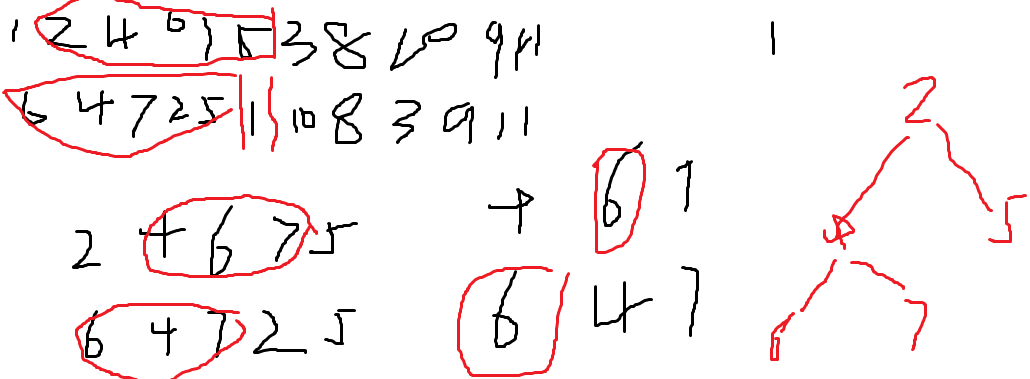

我的做法是，找到中序中与前序第一个数相等的那个位置为根节点，左边的数组构造左子树，右边的数组构造右子树。

In [ ]:
class Solution {
private:
    unordered_map<int, int> index;
public:
    TreeNode* buildTree(vector<int>& preorder, vector<int>& inorder) {
        int n = preorder.size();
         for (int i = 0; i < n; ++i) {
            index[inorder[i]] = i;
        }
        return buildTree(preorder, 
                         inorder,
                         0, 
                         n - 1,
                         0,
                         n - 1);
    }
    TreeNode* buildTree(vector<int>& preorder, vector<int>& inorder, int idx_left_preorder, int idx_right_preorder, int idx_left_inorder, int idx_right_inorder){

        if(idx_left_preorder > idx_right_preorder) return NULL;

        int root_val = preorder[idx_left_preorder];
        int idx_root_inorder = index[root_val];
        TreeNode* root = new TreeNode(root_val);
        int size_left_subtree = idx_root_inorder - idx_left_inorder;
        root->left = buildTree(preorder,
                               inorder,
                               idx_left_preorder + 1,
                               idx_left_preorder + size_left_subtree, 
                               idx_left_inorder, 
                               idx_root_inorder - 1);
        root->right = buildTree(preorder,
                               inorder,
                               idx_left_preorder + size_left_subtree + 1,
                               idx_right_preorder, 
                               idx_root_inorder + 1, 
                               idx_right_inorder);
        return root;
    }
    
};

### 106 从中序遍历与后序遍历构造二叉树
根据一棵树的中序遍历与后序遍历构造二叉树。

注意:
你可以假设树中没有重复的元素。

例如，给出

中序遍历 inorder = [9,3,15,20,7]
后序遍历 postorder = [9,15,7,20,3]
返回如下的二叉树：

    3
   / \
  9  20
    /  \
   15   7

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/construct-binary-tree-from-inorder-and-postorder-traversal
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
中序[6, 4, 7, 2, 5, 1, 10, 8, 3, 9, 11]  
后序[6, 7, 4, 5, 2, 10, 8, 11, 9, 3, 1]  
首先后续遍历序列的最后一个是树的根节点，1，在中序遍历序列中找到根节点1，左边部分构造树的左子树，右边部分构造树的右子树。

In [ ]:
class Solution {
private:
    unordered_map<int, int> index;
public:
    TreeNode* buildTree(vector<int>& inorder, vector<int>& postorder) {
        if(inorder.empty()) return NULL;
        int n = postorder.size();
        for(int i = 0; i < n; ++i){
            index[inorder[i]] = i;
        }
        return buildTree(inorder,
                         postorder,
                         0,
                         n - 1,
                         0,
                         n - 1);
        
    }
    TreeNode* buildTree(vector<int>& inorder, 
                        vector<int>& postorder, 
                        int left_inorder, 
                        int right_inorder,
                        int left_postorder, 
                        int right_postorder) {
        if(left_postorder > right_postorder) return NULL;
        // 获取根节点的值
        int root_val = postorder[right_postorder];
        // 在中序遍历序列中找到根节点的位置
        int idx_root = index[root_val];
        // 先构建根节点
        TreeNode* root = new TreeNode(root_val);
        // 获取左子树的节点个数
        int size_left_subtree = idx_root - left_inorder;
        // 递归构建左子树
        root->left = buildTree(inorder,
                               postorder,
                               left_inorder,
                               idx_root - 1,
                               left_postorder,
                               left_postorder + size_left_subtree - 1);
        root->right = buildTree(inorder,
                                postorder,
                                idx_root + 1,
                                right_inorder,
                                left_postorder + size_left_subtree,
                                right_postorder - 1);
        return root;
    }
};

### 107 二叉树的层次遍历 2
给定一个二叉树，返回其节点值自底向上的层次遍历。 （即按从叶子节点所在层到根节点所在的层，逐层从左向右遍历）

例如：
给定二叉树 [3,9,20,null,null,15,7],

    3
   / \
  9  20
    /  \
   15   7
返回其自底向上的层次遍历为：

[
  [15,7],
  [9,20],
  [3]
]



来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/binary-tree-level-order-traversal-ii
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
102题，自顶向下遍历，得到这个结果后逆序输出。

In [ ]:
class Solution {
public:
    vector<vector<int>> levelOrderBottom(TreeNode* root) {
        vector<vector<int>> res;
        if(!root) return res;
        queue<TreeNode*> q;
        q.push(root);
        stack<vector<int>> mid_stack;
        while(!q.empty()){
            int size_level = q.size();
            vector<int> temp;
            for(int i = 1; i <= size_level; ++i){
                TreeNode* node = q.front(); q.pop();
                temp.push_back(node->val);
                if(node->left) q.push(node->left);
                if(node->right) q.push(node->right);
            }
            mid_stack.push(temp);
        }
        while(!mid_stack.empty()){
            res.push_back(mid_stack.top());
            mid_stack.pop();
        }
        return res;
    }
};

逆序输出那里，C++ 算法库里面有一个函数方便逆序：  
// Reverse the elements in the vector
reverse (v1.begin( ), v1.end( ) );

### 108 将有序数组转换为二叉搜索树
将一个按照升序排列的有序数组，转换为一棵高度平衡二叉搜索树。

本题中，一个高度平衡二叉树是指一个二叉树每个节点 的左右两个子树的高度差的绝对值不超过 1。

示例:

给定有序数组: [-10,-3,0,5,9],

一个可能的答案是：[0,-3,9,-10,null,5]，它可以表示下面这个高度平衡二叉搜索树：

      0
     / \
   -3   9
   /   /
 -10  5

来源：力扣（LeetCode）
链接：https://leetcode-cn.com/problems/convert-sorted-array-to-binary-search-tree
著作权归领扣网络所有。商业转载请联系官方授权，非商业转载请注明出处。

#### 思路
最开始的思路是构造所有可能的二叉搜索树，然后从中寻找平衡二叉树。

In [ ]:
class Solution {
public:
    TreeNode* sortedArrayToBST(vector<int>& nums) {
        if(nums.empty()) return NULL;
        vector<TreeNode*> all_trees = generateTrees(nums, 0, nums.size() - 1);
        for(int i = 0; i < all_trees.size(); ++i){
            if(isBanlance(all_trees[i])) {
                return all_trees[i];
                break;
            }
        }
        return NULL;
    }
    int getHigh(TreeNode* root, int high){
        if(root == NULL) return 0;
        return max(getHigh(root->left, high + 1), getHigh(root->right, high + 1));
    }
    bool isBanlance(TreeNode* root){
        if(root == NULL) return true;
        int a = getHigh(root->left, 0) - getHigh(root->right, 0);
        int abs = a >= 0 ? a : -a;
        return abs > 1 ? false : true;
    }
    vector<TreeNode*> generateTrees(vector<int>& nums, 
                                    int start, 
                                    int end){
        if(start > end) return {NULL};
        vector<TreeNode*> all_trees;
        int size = nums.size();
        for(int i = start; i <= end; ++i){
            vector<TreeNode*> left_trees = generateTrees(nums, start, i - 1);
            vector<TreeNode*> right_trees = generateTrees(nums, i + 1, end);
            for(TreeNode* left : left_trees){
                for(TreeNode* right : right_trees){
                    TreeNode* current_tree = new TreeNode(nums[i]);
                    current_tree->left = left;
                    current_tree->right = right;
                    all_trees.emplace_back(current_tree);
                }
            }
        }
        return all_trees;
    }
};

看了题解之后，发现由于是升序排列的数组可以保证是二叉搜索树的中序遍历，这样，一直选择中间位置左边的数字作为根节点递归构造左右节点就能得到平衡二叉搜索树。

In [ ]:
class Solution {
public:
    TreeNode* sortedArrayToBST(vector<int>& nums) {
        return helper(nums, 0, nums.size() - 1);
    }

    TreeNode* helper(vector<int>& nums, int left, int right) {
        if (left > right) {
            return nullptr;
        }

        // 总是选择中间位置左边的数字作为根节点
        int mid = (left + right) / 2;

        TreeNode* root = new TreeNode(nums[mid]);
        root->left = helper(nums, left, mid - 1);
        root->right = helper(nums, mid + 1, right);
        return root;
    }
};
